In [1]:
import numpy as np
import sympy as sp
from IPython.display import *
import matplotlib.pyplot as plt
%matplotlib inline 
sp.init_printing(use_latex=True)

# 1

In [2]:
x = sp.var('x')
y = sp.Function('y')(x)
y1 = y.diff(x)
y2 = y1.diff(x)

In [3]:
def find_solution_for(num, dx, mat, var=x, fun=y, free_vars=set([])):
    display(HTML('<b>' + num + ')</b>'))
    display(dx)
    dxs = sp.dsolve(dx, fun).simplify()
    display(dxs)
    syms = dxs.free_symbols - set([var]) - free_vars
    wilds = [[x, sp.Wild(str(x))] for x in syms]
    dxs1 = mat.match(dxs.subs(dict(wilds)).rhs)
    display(dxs1)
    display(sp.Eq(fun, mat))
    print(r'■' if dxs1 != None else r'⚡')

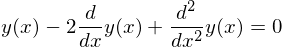

■


In [4]:
find_solution_for(
    'a',
    sp.Eq(y2 - 2 * y1 + y),
    x*sp.E**x
)

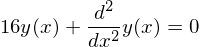

■


In [5]:
a = sp.var('a')
find_solution_for('b',
                  sp.Eq(y2 + 16 * y),
                  a*sp.cos(4*x)
                 )

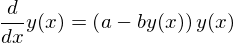

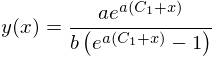

None

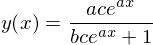

⚡


In [6]:
a,b,c = sp.var('a b c')
find_solution_for('c',
                 sp.Eq(y1, (a - b*y)*y),
                 (a*c*sp.E**(a*x))/(1 + b*c*sp.E**(a*x)),
                 free_vars=set([a,b,c]))

# 2

In [7]:
import numpy as np
def plotdf(f, xran=[-5, 5], yran=[-5, 5], grid=[21, 21], color='k', sol=None, y=0.):
    x = np.linspace(xran[0], xran[1], grid[0])
    y = np.linspace(yran[0], yran[1], grid[1])
    def dX_dt(X, Y, t=0): return f(X,Y)
    
    X, Y  = np.meshgrid(x, y)  # create a grid
    DX = dX_dt(X, Y)            # compute growth rate on the grid  
    DY = np.ones_like(DX)
    DY[DX == 0] = 0.
    M = np.hypot(DX, DY)      # Norm of the growth rate 
    M[M == 0] = 1.             # Avoid zero division errors 
    DX = DX/M                   # Normalize each arrows
    DY = DY/M  
    plt.quiver(X, Y, DY, DX, pivot='mid', color=color)
    plt.xlim(xran), plt.ylim(yran)
    plt.grid('on')
    if sol != None:
        Vs = [sol(xp) for xp in x]
        plt.plot(x, Vs)
    return [X,Y, plt]

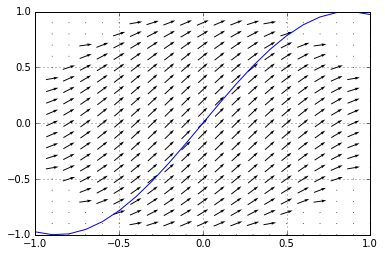

In [8]:
def kolko(X,Y):
    v = 1 - X**2 - Y**2
    return np.sqrt(np.maximum(v, 0.))

sol = lambda x: np.sin(x*1.8)
    
X,Y,plt = plotdf(kolko, xran=[-1, 1], yran=[-1, 1], sol=sol)

In [9]:
def fun(X,Y):
    v = -X
    Y[Y==0] = 0.001
    return -X/Y

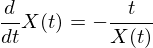

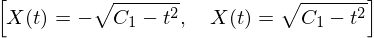

In [10]:
t = sp.var('t')
X = sp.Function('X')(t)
dx = sp.Eq(X.diff(t), -t/X)
display(dx)
dxs = sp.dsolve(dx, X)
display(dxs)

In [11]:

sol = lambda x: np.sqrt(0.5 - x**2)

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


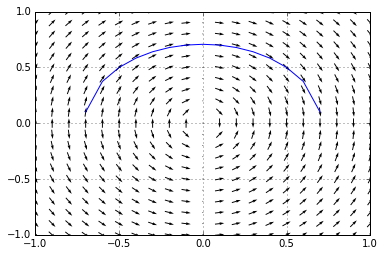

In [12]:
C = 1
X,Y,plt  = plotdf(fun, xran=[-C,C], yran=[-C, C], sol=sol)

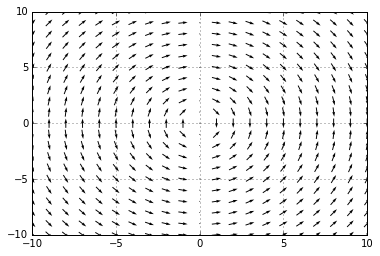

In [13]:
C = 10
X,Y,plt = plotdf(fun, xran=[-C,C], yran=[-C, C])

# 3

## a

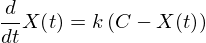

In [14]:
t = sp.var('t')
k, C = sp.symbols('k C')
X = sp.Function('X')(t)
dx = sp.Eq(X.diff(t), k*(C - X))
display(dx)
dxs = sp.dsolve(dx, X).simplify()
display(dxs)

In [20]:
sol = lambda x: np.exp(-0.9*x) + 0.1

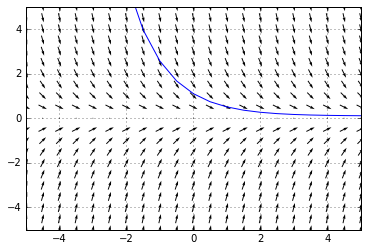

In [21]:
k = 1.
C = 0.
def fun(X,Y):
    return (-Y + C) * k
X,Y,plt = plotdf(fun, sol=sol)

# 4

## a)

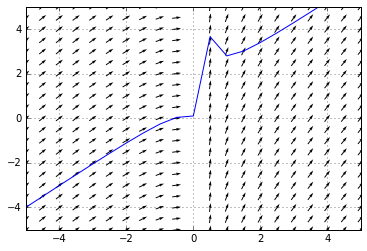

In [27]:
def fun(X,Y):
    X[X==0] = 1000.
    return np.exp(1/X)
sol = lambda x: 0.1 + x * np.exp(1./(x+0.01))
_,_,_ = plotdf(fun, sol=sol)

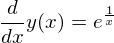

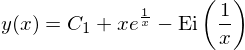

In [15]:
x = sp.var('x')
y = sp.Function('y')(x)
dy = sp.Eq(y.diff(x), sp.E**(1/x))
display(dy)
dxs = sp.dsolve(dy, y).simplify()
display(dxs)

## b)

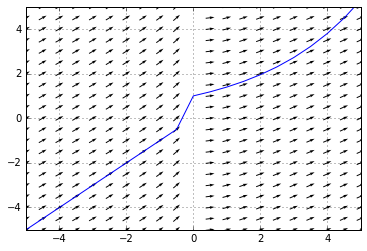

In [37]:
def fun(X,Y):
    X[X==0] = 1000.
    return 1./(1. + np.exp(1./X))
sol = lambda x: x if x < 0 else np.exp(x/3.)
X,Y,plt = plotdf(fun, sol=sol)

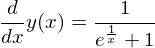

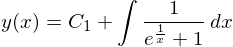

In [17]:
x = sp.var('x')
y = sp.Function('y')(x)
dy = sp.Eq(y.diff(x), 1/(1+sp.E**(1/x)))
display(dy)
dxs = sp.dsolve(dy, y).simplify()
display(dxs)

## c)

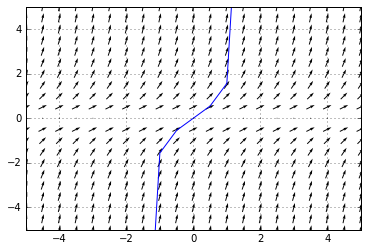

In [41]:
fun = lambda X,Y: np.abs(Y)
sol = lambda x: np.tan(x) if -2 < x < 2 else np.inf
_,_,_ = plotdf(fun, sol=sol)

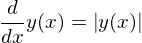

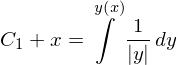

In [19]:
x = sp.var('x')
y = sp.Function('y')(x)
dy = sp.Eq(y.diff(x), sp.Abs(y))
display(dy)
dxs = sp.dsolve(dy, y).simplify()
display(dxs)

## d)

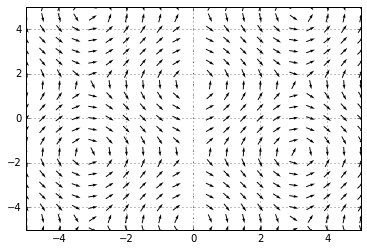

In [20]:
fun = lambda X,Y: np.sin(X)/np.cos(Y)
_,_,_ = plotdf(fun)

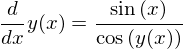

In [21]:
x = sp.var('x')
y = sp.Function('y')(x)
dy = sp.Eq(y.diff(x), sp.sin(x)/sp.cos(y))
display(dy)
dxs = sp.dsolve(dy, y)
display(dxs)

## e)

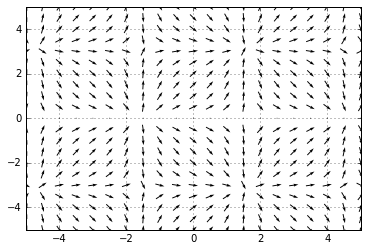

In [22]:
fun = lambda X,Y: np.sin(Y)/np.cos(X)
_,_,_ = plotdf(fun)

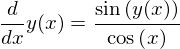

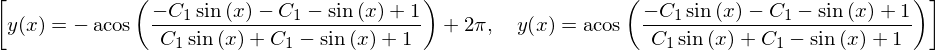

In [23]:
x = sp.var('x')
y = sp.Function('y')(x)
dy = sp.Eq(y.diff(x), sp.sin(y)/sp.cos(x))
display(dy)
dxs = sp.dsolve(dy, y)
display(dxs)

In [41]:
dxs[1].rhs.subs({ 'C1' : 1, x: 1}).evalf()